In [1]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [178]:
correct = 10 + 2 * 50 + 0.6 * (50 ** 2)

In [254]:
predictions50 = []
for i in range(100):
    x_train = np.tile(np.arange(1, 25), 4)
    y_train = 10 + 2 * x_train + 0.6 * (x_train ** 2) + np.random.normal(loc=0, scale=1, size=len(x_train))
    model = LinearRegression()
    model.fit(x_train.reshape(-1, 1), y_train)
    y_hat = model.predict([[50]])
    predictions50.append(y_hat[0])

0.24101833653671823


<AxesSubplot:ylabel='Count'>

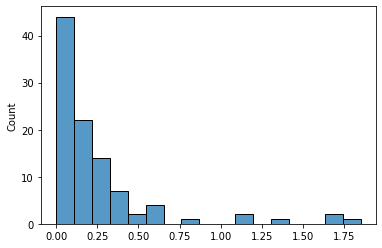

In [255]:
# how spread out are the predictions at 50?
variation = (predictions50 - np.mean(predictions50)) ** 2
print(variation.mean())
sns.histplot(variation)

-814.8884808598267


<AxesSubplot:ylabel='Count'>

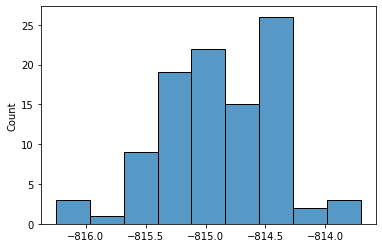

In [256]:
# how "correct" are the predictions at 50?
error = np.array(predictions50) - correct
print(error.mean())
sns.histplot(error)

In [258]:
predictions50_2 = []
for i in range(100):
    x_train = np.tile(np.arange(1, 25), 4)
    y_train = 10 + 2 * x_train + 0.6 * (x_train ** 2) + np.random.normal(loc=0, scale=1, size=len(x_train))
    # let's use a more complicated model with a log(x) term
    x_train = np.matrix([x_train, np.log(x_train)]).T
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_hat = model.predict([[50, np.log(50)]])
    predictions50_2.append(y_hat[0])

1.0035046222123243


<AxesSubplot:ylabel='Count'>

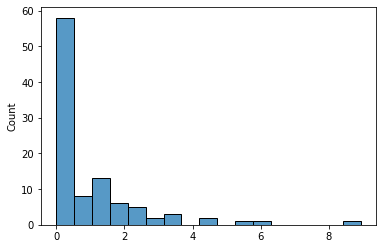

In [261]:
# how spread out are the predictions around 50?
variation = (predictions50_2 - np.mean(predictions50_2)) ** 2
print(variation.mean())
sns.histplot(variation)

Our predictions are more volatile

-635.5503271498499


<AxesSubplot:ylabel='Count'>

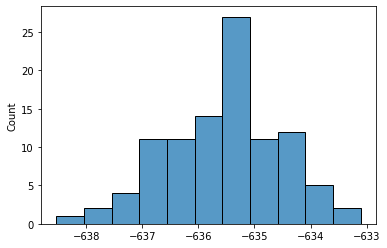

In [260]:
# how "correct" are the predictions around 50?
error = np.array(predictions50_2) - correct
print(error.mean())
sns.histplot(error)

our predictions are more "correct"